# Preparación

In [1]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def bubble_sort(arr):
    def swap(i, j):
        arr[i], arr[j] = arr[j], arr[i]

    n = len(arr)
    swapped = True
    
    x = -1
    while swapped:
        swapped = False
        x = x + 1
        for i in range(1, n-x):
            if arr[i - 1] > arr[i]:
                swap(i - 1, i)
                swapped = True
                    
    return arr

In [3]:
def selection_sort(arr):        
    for i in range(len(arr)):
        minimum = i
        
        for j in range(i + 1, len(arr)):
            # Select the smallest value
            if arr[j] < arr[minimum]:
                minimum = j

        # Place it at the front of the 
        # sorted end of the array
        arr[minimum], arr[i] = arr[i], arr[minimum]
            
    return arr

In [4]:
def insertion_sort(arr):
        
    for i in range(len(arr)):
        cursor = arr[i]
        pos = i
        
        while pos > 0 and arr[pos - 1] > cursor:
            # Swap the number down the list
            arr[pos] = arr[pos - 1]
            pos = pos - 1
        # Break and do the final swap
        arr[pos] = cursor

    return arr

In [5]:
def merge_sort(arr):
    # The last array split
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    # Perform merge_sort recursively on both halves
    left, right = merge_sort(arr[:mid]), merge_sort(arr[mid:])

    # Merge each side together
    return merge(left, right, arr.copy())


def merge(left, right, merged):

    left_cursor, right_cursor = 0, 0
    while left_cursor < len(left) and right_cursor < len(right):
      
        # Sort each one and place into the result
        if left[left_cursor] <= right[right_cursor]:
            merged[left_cursor+right_cursor]=left[left_cursor]
            left_cursor += 1
        else:
            merged[left_cursor + right_cursor] = right[right_cursor]
            right_cursor += 1
            
    for left_cursor in range(left_cursor, len(left)):
        merged[left_cursor + right_cursor] = left[left_cursor]
        
    for right_cursor in range(right_cursor, len(right)):
        merged[left_cursor + right_cursor] = right[right_cursor]

    return merged

In [6]:
def partition(array, begin, end):
    pivot_idx = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot_idx += 1
            array[i], array[pivot_idx] = array[pivot_idx], array[i]
    array[pivot_idx], array[begin] = array[begin], array[pivot_idx]
    return pivot_idx

def quick_sort_recursion(array, begin, end):
    if begin >= end:
        return
    pivot_idx = partition(array, begin, end)
    quick_sort_recursion(array, begin, pivot_idx-1)
    quick_sort_recursion(array, pivot_idx+1, end)
    return array

def quick_sort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1
    
    return quick_sort_recursion(array, begin, end)

In [7]:
min = 1
max = 1000000
n = 100
v = random.sample(range(min, max), n)
quick_sort(v) == merge_sort(v) == insertion_sort(v) == selection_sort(v) == bubble_sort(v)

True

## Timing

In [8]:
def microbench(callable_obj, plt, label, n_max = 100, st = 1):
    n_min = 10 
    st = 1
    sz = 5 # iteraciones del benchmark

    t_quick_2 = list()
    for n in range(n_min, n_max, st):
        v = random.sample(range(1, 1000000), n)
        t_quick_2.append(timeit.timeit(lambda: callable_obj(v), number = sz))

    plt.plot(list(range(n_min, n_max)), t_quick_2, label= label + '; step = ' + str(st))
    plt.xlabel('n')
    plt.ylabel('costo')
    plt.legend()
    
    return plt

In [9]:
n_min = 10
n_max = 1000
st = 10
sz = 10 # iteraciones del benchmark

t_bubble_1 = list()
for n in range(n_min, n_max, st):
    v = random.sample(range(1, 1000000), n)
    t_bubble_1.append(timeit.timeit(lambda: bubble_sort(v), number = sz))
    
t_sele_1 = list()
for n in range(n_min, n_max, st):
    v = random.sample(range(1, 1000000), n)
    t_sele_1.append(timeit.timeit(lambda: selection_sort(v), number = sz))
    
t_insert_1 = list()
for n in range(n_min, n_max, st):
    v = random.sample(range(1, 1000000), n)
    t_insert_1.append(timeit.timeit(lambda: insertion_sort(v), number = sz))
    
t_merge_1 = list()
for n in range(n_min, n_max, st):
    v = random.sample(range(1, 1000000), n)
    t_merge_1.append(timeit.timeit(lambda: merge_sort(v), number = sz))
    
t_quick_1 = list()
for n in range(n_min, n_max, st):
    v = random.sample(range(1, 1000000), n)
    t_quick_1.append(timeit.timeit(lambda: quick_sort(v), number = sz))

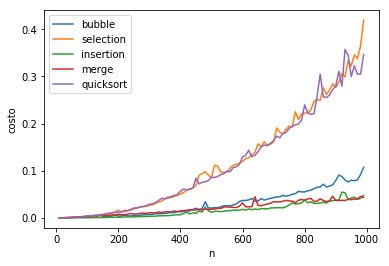

In [10]:
# sz = 10
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_bubble_1, label = 'bubble')
plt.xlabel('n')
plt.ylabel('costo')


plt.plot(eje_x, t_sele_1, label = 'selection')
plt.plot(eje_x, t_insert_1, label = 'insertion')
plt.plot(eje_x, t_merge_1, label = 'merge')
plt.plot(eje_x, t_quick_1, label = 'quicksort')
plt.legend()